<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Finite_difference_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal
* Apply the finite difference method to solve steady state differential equations
* Apply linear system solution methods to real applications
* Be able to implement Dichilet and Neumann boundary conditions

# The Finite Difference method

In the past lecture, we saw how to write derivatives in terms of the function evaluated at discrete points. Let's use it and see what we've been building up to.

Lets take an unkown function $f(x)$ and *discretize it* by sampling it at a set of coordinates. We saw that finite difference benefits from equal spacing, so lets sample it with an even step size $h$.

For a function $y(x)$ we would get:

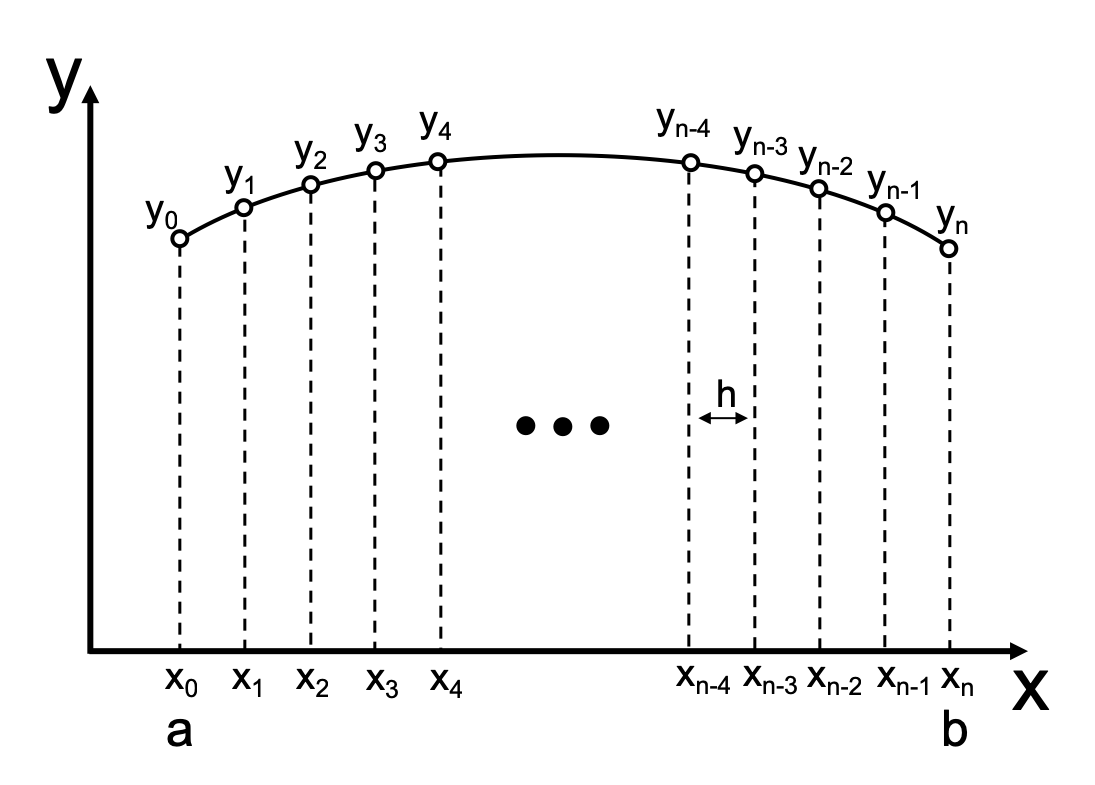

Finite difference allows us to express the derivatives of $y(x)$ in terms of the vector elements. For step size $h$, we have:

| Finite Difference Approximation | Formula in terms of $y_i$  | Order of Accuracy |
|---|---|---|
| Forward difference (1st derivative) | $y'(x_i) \approx (y_{i+1} - y_i) / h$ | O(h) |
| Backward difference (1st derivative) | $y'(x_i) ≈ (y_i - y_{i-1}) / h$ | O(h) |
| Central difference (1st derivative) | $y'(x_i) ≈ (y_{i+1} - y_{i-1}) / (2h)$ | O(h²) |
| Forward difference (2nd derivative) | $y''(x_i) ≈ \frac{y_{i+2} - 2y_{i+1} + y_i} {h^2}$ | O(h) |
| Backward difference (2nd derivative) | $y''(x_i) ≈ (y_i - 2y_{i-1} + y_{i-2}) / h²$ | O(h) |
| Central difference (2nd derivative) | $y''(x_i) ≈ (y_{i+1} - 2y_i + y_{i-1}) / h^2$ | O(h²) |

The finite difference method applied to the discretized function lets us write the differential equation in terms neighbouring values (or the boundary conditions)!

#### Example: Rocket tragectory


We are going out to launch a rocket, and let y(t) be the altitude (meters from the surface) of the rocket at time t. We know the gravity $g=9.8m/s^2$.

If we want to have the rocket at 50 m off the ground 5 seconds after launching, what should be the velocity at launching? (we ignore the drag of the air resistance).

The ODE is

$$ \begin{align}
\frac{d^2y}{dt^2} &= -g \\
\frac{y_{i+1} - 2y_{i} + y_{i-1}} {h^2} &= -g
\end{align}
$$

This expression only applies in *interior* points. We must use the boundary conditions $y(0) = 0$ and $y(5) = 50$.

Let's take $n=10$. Since the time interval is $[0, 5]$ and we have $n=10$, therefore, $h=0.5$. Using the finite difference approximated derivatives, we have

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} = -gh^2, \;i = 1, 2, ..., n-1$$

$$ y_{10} = 50$$

This looks awfully familiar...

It's just our familiar linear system!

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2& 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\-gh^2 \\ ... \\ -gh^2 \\50\end{array}\right]$$

and how do we solve linear systems?!?

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

n = 10

def get_A_and_b(n):
  h = (5.-0) / n

  # Get A
  A = np.zeros((n+1, n+1))
  A[0, 0] = 1
  A[n, n] = 1
  for i in range(1, n):
      A[i, i-1] = 1
      A[i, i] = -2
      A[i, i+1] = 1

  # Get b
  b = np.zeros(n+1)
  b[1:-1] = -9.8*h**2
  b[-1] = 50

  return A,b

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]



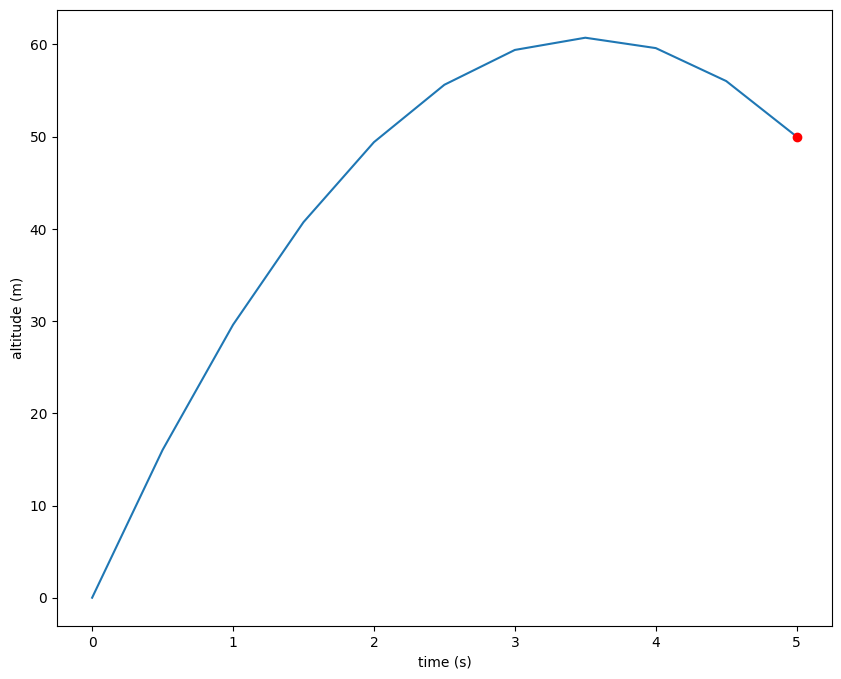

In [ ]:
n = 10
A,b = get_A_and_b(n=10)

print(A)
print(b)

# solve the linear equations
y = sp.linalg.solve(A, b)

print()

t = np.linspace(0, 5, n+1)
plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

For the velocity, $y'(0)$ we can calculate using the forward difference:

In [ ]:
(y[1] - y[0])/(5/n)

32.05

which is pretty good compared to the analytic answer 34.5 .

#### Example: Neuman boundary condition


Using finite difference method to solve the following linear boundary value problem:

$$ y''(x) = -4y(x) +4x $$

with the boundary conditions: $y(0) = 0$ and $y'(\pi/2)=0$.

The Dirichlet boundary condition is simple:
$$ y_0 = 0$$


The interior points are a little more complex. We need to move all the terms with the dependant quantity ($y$) to the left and everything else (including $x$ terms) to the right.  

$$\begin{align}
y''(x) &= -4y(x) +4x \\
\frac{y_{i-1} - 2 y_i + y_{i+1}}{h^2} +4y_i &= 4x_i \\
y_{i-1} - 2y_i + y_{i+1} + 4 h^2 y_i&= -4 h^2 x_i
\end{align} $$

for  $i = 1, 2, ..., n-1$

But what should we do for the boundary $y'(\pi/2) = 0$?

We can actually just write it out exactly in finite difference:

$$\begin{align}
\frac{y_i - y_{i-1}}{h} &= 0 \\
y_i - y_{i-1} = 0
\end{align}$$

Using matrix notation, we have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2+4h^2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2+4h^2 & 1 \\
 & & & -1 & 1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\4h^2x_1 \\ ... \\ 4h^2x_{n-1} \\4h^2x_{n}\end{array}\right]$$

Lets see what we get compared to the analytic answer $y=x+0.5 \sin2x$

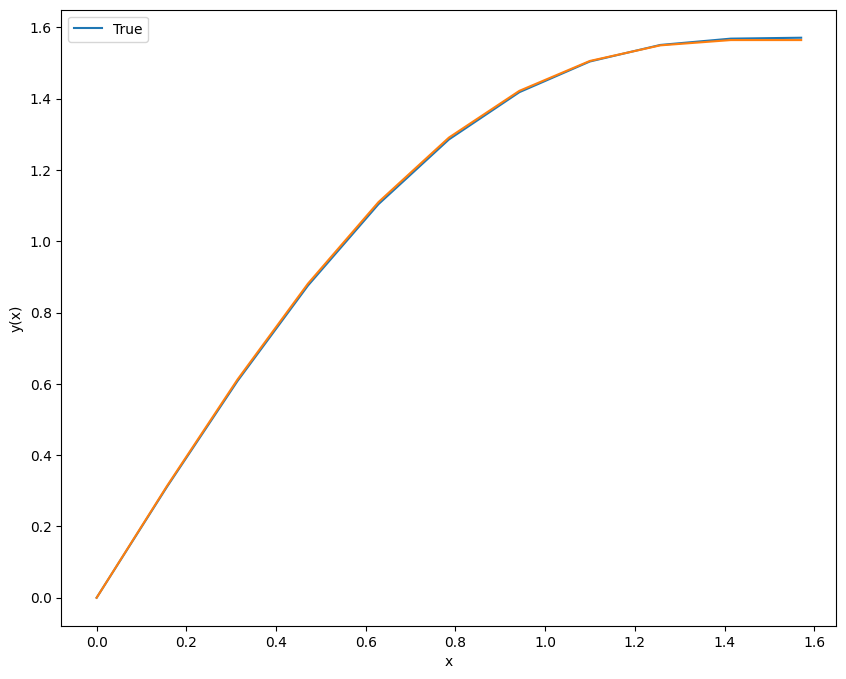

In [ ]:
# prompt: Solve the above linear system and plot y vs x

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

n = 10

def get_A_and_b(n):
  h = (np.pi/2 - 0) / n

  # Get A
  A = np.zeros((n+1, n+1))
  A[0, 0] = 1
  A[n, n-1] = -1
  A[n, n] = 1
  for i in range(1, n):
      A[i, i-1] = 1
      A[i, i] = -2 + 4*h**2
      A[i, i+1] = 1

  # Get b
  b = np.zeros(n+1)
  for i in range(1, n):
      b[i] = 4*h**2*(i*h)

  return A,b

A,b = get_A_and_b(n=10)

# solve the linear equations
y = sp.linalg.solve(A, b)

y_true = lambda x: x + .5*np.sin(2*x)

x = np.linspace(0, np.pi/2, n+1)
plt.figure(figsize=(10,8))
plt.plot(x, y_true(x), label="True")
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

##### Higher order accuracy boundary

Alternately, as a bit of a trick to gain accuracy, the Neuman condition at the boundary can be considered with the central difference for $y_n$ (despite $y_{n+1}$ not existing!):

$$ \begin{align}
\frac{y_{n+1}-y_{n-1}}{2h} &= 0\\
y_{n+1} &= y_{n-1}
\end{align} $$

We substitute this into the equation for the interior points to get:

$$ 2y_{n-1}-2y_n -h^2(-4y_n+4x_n)=0$$

which should have second order accuracy.

Now we have

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2+4h^2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2+4h^2 & 1 \\
 & & & 2 &-2+4h^2
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\4h^2x_1 \\ ... \\ 4h^2x_{n-1} \\4h^2x_{n}\end{array}\right]$$

Lets compare this solution vs the previous formula in terms of $y'(\pi/2)$

In [ ]:
def get_A_and_b_2(n):
  h = (np.pi/2 - 0) / n

  # Get A
  A = np.zeros((n+1, n+1))
  A[0, 0] = 1
  A[n, n] = -2+4*h**2
  A[n, n-1] = 2
  for i in range(1, n):
      A[i, i-1] = 1
      A[i, i] = -2 + 4*h**2
      A[i, i+1] = 1

  # Get b
  b = np.zeros(n+1)
  for i in range(1, n+1):
      b[i] = 4*h**2*(i*h)

  return A,b

print('Old')
for n in range(10,30,5):
  # Original implementation:
  A,b = get_A_and_b(n)
  y = sp.linalg.solve(A, b)
  print(y[-1])

print('New')
# New boundary condition
for n in range(10,30,5):
  A,b = get_A_and_b_2(n)
  y = sp.linalg.solve(A, b)
  print(y[-1])

print('True')
print(y_true(np.pi/2))

Old
1.5641951194959582
1.5678968928038604
1.5691723081328415
1.569759027706592
New
1.5641814012620596
1.5678951310352263
1.5691718937395551
1.569758892476149
True
1.5707963267948966


The higher order implementation is more accurate (for the same computational complexity), but the step size still domainates the quality of the answer.

## Example 3: Nonlinear systems

Solve the boundary value problem,

$$ \begin{align}
y'' &= -3 y y'
\end{align}
$$

with $y(0) = 0$ and $y(2) = 1$.  

The Dirichlet boundary conditions are easy, and the interior points are given by:
$$ \begin{align}
\frac{y_{i-1} -2 y_i +y_{i+1}}{h^2} &= -3 y_i \bigg[ \frac{y_{i+1} - y_{i-1}}{2h} \bigg]
\end{align}
$$

How do we solve this?

Since this system is *nonlinear* we will need to use a *nonlinear solver* which is a root finder! In particular, we need to find the root of the residual,

$$
\begin{align}
y_{i-1} -2 y_i +y_{i+1} + 3 h y_i [y_{i+1} - y_{i-1}] &=0 \\
\vec{R}(\vec{y}) &= \vec{0}
\end{align}
$$






 message: The solution converged.
 success: True
  status: 1
     fun: [-3.711e-26  2.691e-11 -9.336e-11  1.270e-10 -4.548e-12
           -1.767e-10  1.645e-10 -2.525e-11 -5.023e-11  3.169e-11
            0.000e+00]
       x: [-3.711e-26  3.024e-01  5.545e-01  7.347e-01  8.498e-01
            9.181e-01  9.570e-01  9.785e-01  9.902e-01  9.966e-01
            1.000e+00]
  method: hybr
    nfev: 21
    fjac: [[-7.178e-01 -6.963e-01 ...  2.602e-17  0.000e+00]
           [ 5.736e-01 -5.914e-01 ...  2.989e-03  0.000e+00]
           ...
           [ 1.560e-02 -1.609e-02 ... -8.190e-01  0.000e+00]
           [ 0.000e+00 -0.000e+00 ...  0.000e+00 -1.000e+00]]
       r: [-1.393e+00  1.342e+00 ... -1.040e+00 -1.000e+00]
     qtf: [-2.429e-10  5.987e-10 -2.227e-09  3.264e-10 -1.230e-09
            2.292e-09  2.220e-09 -3.106e-09 -8.640e-10  5.212e-10
            0.000e+00]


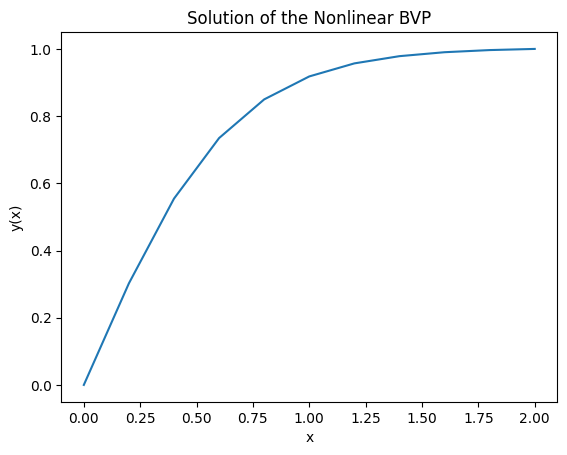

In [ ]:
from scipy.optimize import root

def residual(y, n, h):
  r = np.zeros(n + 1)
  r[0] = y[0]  # y(0) = 0
  r[-1] = y[-1] - 1  # y(2) = 1
  for i in range(1, n):
    r[i] = y[i - 1] - 2 * y[i] + y[i + 1] + 3 * h * y[i] * (y[i + 1] - y[i - 1]) / 2
  return r

n = 10  # Number of grid points
y0 = np.linspace(0, 1, n + 1)  # Initial guess

# Solve the nonlinear system using scipy.optimize.root
sol = root(residual, y0, args=(n,2. / n, ))
print(sol)
y = sol.x

# Plot the solution
x = np.linspace(0, 2, n + 1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution of the Nonlinear BVP')
plt.show()

## Example 4: Multidimensional

Solve the discrete Poisson equation on the unit square,

$-\Delta u = 1$ on $\Omega=[0,1]^2$

with

$u=0$ on $\partial \Omega$

The interior points are given by
$-\Delta u = 1$ on $\Omega=[0,1]^2$

For central difference on a 2D grid with spacing h in both x and y directions, the discrete Laplacian at a point (i,j) is:

$$(u(i+1,j) + u(i-1,j) + u(i,j+1) + u(i,j-1) - 4u(i,j)) / h^2=1$$


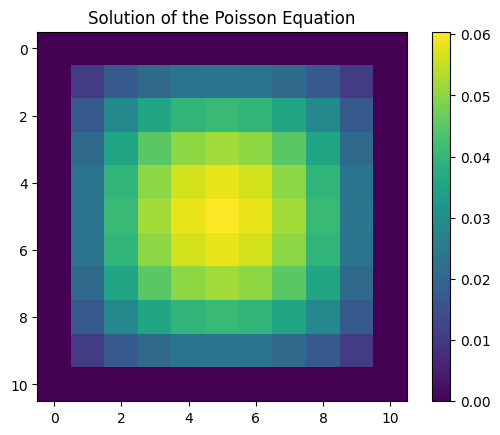

In [ ]:
# prompt: write a code to generate hte matrix u from the equation above with the boundary

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import root

def get_A_and_b_for_poisson(n):
  h = 1. / (n + 1)
  A = np.zeros(((n + 1)**2, (n + 1)**2))
  b = np.zeros((n + 1)**2)

  for i in range(n + 1):
    for j in range(n + 1):
      if i == 0 or i == n or j == 0 or j == n:  # Boundary condition
        row_index = i * (n + 1) + j
        A[row_index, row_index] = 1
      else:  # Interior point
        row_index = i * (n + 1) + j
        A[row_index, row_index] = -4
        A[row_index, (i - 1) * (n + 1) + j] = 1
        A[row_index, (i + 1) * (n + 1) + j] = 1
        A[row_index, i * (n + 1) + (j - 1)] = 1
        A[row_index, i * (n + 1) + (j + 1)] = 1
        b[row_index] = -h**2

  return A, b


n = 10  # Number of grid points in each direction
A, b = get_A_and_b_for_poisson(n)


u = np.linalg.solve(A, b)

# Reshape the solution into a 2D array
u_matrix = u.reshape((n + 1, n + 1))

# Plot the solution
plt.imshow(u_matrix, cmap='viridis')
plt.colorbar()
plt.title('Solution of the Poisson Equation')
plt.show()

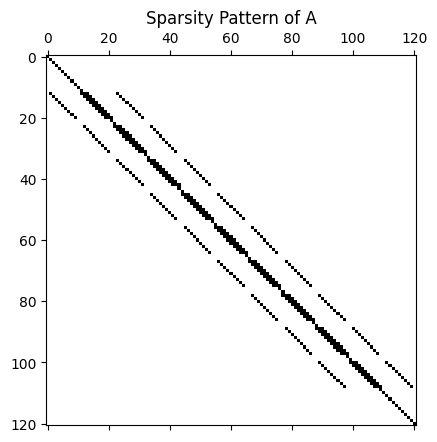

In [ ]:
# prompt: Plot the sparsity pattern of A

plt.spy(A)
plt.title('Sparsity Pattern of A')
plt.show()

#Summary

### Benefits
1. **Simplicity**: The finite difference method is relatively easy to understand and implement, making it accessible for many users.
2. **Efficiency**: It can be computationally efficient, especially for problems with simple geometries and boundary conditions.
3. **Structured Grids**: Works well with structured grids, which can simplify the discretization process.
4. **High-Order Approximations**: It is possible to obtain high-order approximations, which can improve the accuracy of the solution.

### Drawbacks
1. **Limited Flexibility**: The method is less flexible compared to other methods like finite element or finite volume methods, particularly for complex geometries.
2. **Stability Issues**: Finite difference methods can suffer from stability issues, especially for certain types of partial differential equations.
3. **Boundary Conditions**: Handling complex boundary conditions can be challenging.
4. **Accuracy**: The accuracy of the method can be limited by the discretization error and round-off error.
